In [0]:
import pandas as pd 
import fastai

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
ls

drive/  sample_data/


In [4]:
cd drive/My\ Drive/ML\ Projects

/content/drive/My Drive/ML Projects


In [5]:
ls

 CatandDogclassificationVGGTrasnferlearning/  'Image classification'/
'Credit Card Fraud Detection'/                 keras-mnist-tutorial/
'facenet_facial _recognition'/                'Neural Style Transfer'/
'Facial KeyPoints'/                            predikly/
 home_loan/                                    try.zip
 Homonymes/


In [6]:
cd Homonymes/

/content/drive/My Drive/ML Projects/Homonymes


In [7]:
ls

 bppt_panl.csv               id/
 bppt_panl_x.csv             ind_clas.pkl
'Copy of homonymes.ipynb'    models/
 gua_dic.csv                'open?id=1NzWqxRau8SHBvmvgqnlNlNYVjJcQYSJc'
'gua lapar parah sekarang'   PANL-BPPT-ECO-ID-150Kw.txt
 HOMO                        PANL-BPPT-INT-ID-150Kw.txt
 HOMO_DIC.csv                PANL-BPPT-SCI-ID-100Kw.txt
 homonymes.ipynb             PANL-BPPT-SPO-ID-100Kw.txt
 Homo.pkl                    peres_dic.csv


In [0]:
df1 = pd.read_csv('bppt_panl_x.csv',error_bad_lines=False,header=None)


In [9]:
df1

,0,1
0,0,Menteri Keuangan Sri Mulyani mengatakan koreks...
1,0,Dalam jumpa pers bersama Dirut Bursa Efek Jaka...
2,0,Kita melihat faktor inflasi dari makanan akan ...
3,0,Demikian pula dengan harga minyak.
4,0,"Kondisi APBN 2007 pada dua pekan awal, secara ..."
...,...,...
24019,3,"Mantan pemain internasional Belanda, Koeman, m..."
24020,3,Valencia kemudian beradadi urutan keempat pada...
24021,3,Media Spanyol pada Senin juga melaporkan bahwa...
24022,3,Laporan tersebut menyebutkan delegasi klub Sal...


In [0]:
df1.columns=['Category','text']

In [0]:
# import libraries
import fastai
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np
from functools import partial
import io
import os

In [0]:
from sklearn.model_selection import train_test_split

# split data into training and validation set
df_trn, df_val = train_test_split(df1, stratify = df1['Category'], test_size = 0.2, random_state = 12)

In [13]:
df_trn, df_val


(       Category                                               text
 1983          0  sebagai pengganti konsorsium yang sama yaitu I...
 1404          0  Hingga kini dana yang diinvestasikan di Indone...
 2339          0               Bulan depan kita sampaikan, katanya.
 6504          0  Usaha mikro memiliki laba atau profit margin y...
 23532         3  Kami terus menerus ditekan, tetapi kami melaku...
 ...         ...                                                ...
 10275         1  Christopher Garver, jurubicara militer AS, men...
 21805         3  Mancini mengeluarkan pernyataannya itu menyusu...
 17996         2  Menghasilkan zat bergizi yang baru yaitu madu ...
 7088          1  Kesepakatan ini akan dirampungkan pada perundi...
 8703          1  Laporan terdahulu telah menunjukkan bahwa peng...
 
 [19219 rows x 2 columns],
        Category                                               text
 15309         2  Telkomsel Press Award 2008 berupa uang tunai s...
 23655         3  N

In [14]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")

# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df_trn, valid_df = df_val, vocab=data_lm.vocab, bs=32)

In [0]:
data_clas.show_batch()

text,target
"xxbos xxmaj tercatat nama - nama perusahaan xxmaj toyota xxmaj motor xxmaj corp , xxmaj suzuki , xxmaj mitsubishi , xxmaj xxunk xxmaj bank , xxup jbic , xxmaj bank of xxmaj tokyo - xxmaj mitsubishi , xxup xxunk , xxmaj xxunk xxmaj xxunk , xxmaj kawasaki xxmaj heavy xxmaj industry , xxmaj xxunk xxmaj inc. dan xxmaj xxunk xxmaj corp , dan xxmaj sumitomo xxmaj life xxmaj insurance xxmaj",0
"xxbos xxmaj direktur xxmaj proyek xxup medc xxmaj lukman xxmaj xxunk , dalam keterbukaan informasinya , mengatakan , pemasokan gas ini dilakukan oleh xxmaj medco xxmaj tomori bersama dengan dan mitra kerja di joint xxunk xxunk xxup job xxmaj pertamina - xxmaj medco xxup e&p xxmaj tomori xxmaj sulawesi xxup job xxmaj tomori ? , xxup pt xxup xxunk xxmaj tomori xxmaj sulawesi xxmaj pertamina xxmaj tomori , yang merupakan",0
"xxbos xxmaj makin banyak gelombang panas seperti yang menewaskan lebih dari 100 orang di xxmaj amerika xxmaj serikat pada 2006 , badai seperti badai pembunuh yang menerjang xxmaj teluk xxmaj meksiko pada 2005 dan kebakaran hutan tampaknya dapat terjadi di xxmaj amerika xxmaj utara sementara xxunk naik , demikian antara lain isi laporan baru yang memberi perincian regional tentang studi panel iklim xxup pbb tentang pemanasan global dan dikeluarkan xxmaj",1
"xxbos xxmaj tiga bank lagi , seperti xxmaj bank xxmaj panin saat mengakuisisi xxmaj bank xxmaj xxunk xxmaj irna xxmaj xxunk dan xxup pt xxmaj bank xxmaj victoria xxmaj international xxmaj tbk xxup bvic saat mengakuisisi saham xxmaj bank xxmaj swaguna juga melaporkan akan mengubahnya menjadi bank syariah , kata xxmaj fadjrijah saat diskusi perbankan syariah yang diselenggarakan xxmaj xxunk xxmaj perbankan dan xxmaj moneter xxmaj partner di xxmaj jakarta",0
"xxbos xxup bi juga mencatat adanya kenaikan pendapatan bunga bersih xxup nii dari xxmaj rp7,7 triliun menjadi xxmaj xxunk triliun karena kenaikan jumlah kredit yang lebih tinggi dari xxup dpk dan aset . xxmaj dan rasio xxup car naik tipis dari 20,7 persen pada xxmaj maret 2007 menjadi 21,2 persen pada xxmaj april 2007 karena kenaikan modal yang lebih tinggi dari xxup xxunk xxmaj aktiva xxmaj tertimbang xxmaj menurut xxmaj",0


In [0]:
data_lm.vocab.save('in_itos.pkl')

In [0]:


data_lm = TextLMDataBunch.from_df(path='', train_df=df_trn, valid_df=df_val)
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3,pretrained=True)




In [0]:
learn.lr_find()


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.91E-02
Min loss divided by 10: 1.10E-01


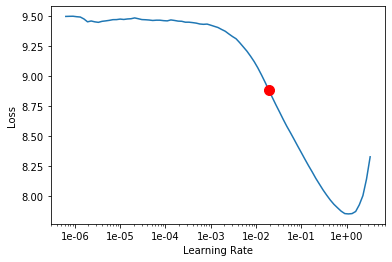

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(5, 1.91E-02,moms=(0.8,0.7))


epoch,train_loss,valid_loss,accuracy,time
0,5.919517,4.960781,0.254637,00:26
1,4.693229,4.334579,0.290855,00:28
2,4.097543,4.157180,0.305134,00:27
3,3.620756,4.086608,0.311096,00:27
4,3.282121,4.087667,0.312442,00:27


In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.09E-05
Min loss divided by 10: 7.59E-08


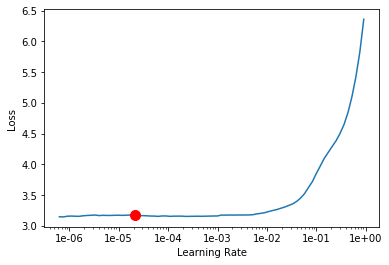

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)


In [0]:
learn.fit_one_cycle(5, 2.09E-04,moms=(0.8,0.7))


epoch,train_loss,valid_loss,accuracy,time
0,3.119714,4.096944,0.313926,00:35
1,3.074723,4.077467,0.317087,00:35
2,2.967506,4.076406,0.318433,00:34
3,2.894019,4.080228,0.319405,00:35
4,2.856879,4.085992,0.319067,00:35


In [0]:
learn.save_encoder('ft_enc_in')
learn.save('ind_lm')


In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM,pretrained=True, drop_mult=0.3)
learn.load_encoder('ft_enc_in')
learn.freeze()


In [0]:
learn.lr_find()


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.09E-03
Min loss divided by 10: 5.25E-02


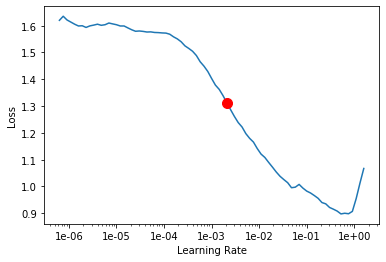

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(5, 5.37E-03,moms=[0.8,0.7])


epoch,train_loss,valid_loss,accuracy,time
0,0.428575,0.255611,0.913424,00:15
1,0.406270,0.244768,0.913840,00:16
2,0.360505,0.237165,0.918002,00:15
3,0.331422,0.229978,0.916129,00:17
4,0.313188,0.224339,0.922164,00:16


In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 9.12E-07
Min loss divided by 10: 2.09E-04


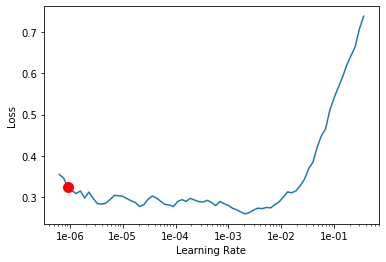

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
min_lr=5E-3

In [0]:
learn.fit_one_cycle(5,  slice(min_lr/(2.6**4),min_lr), moms=(0.8,0.7))


epoch,train_loss,valid_loss,accuracy,time
0,0.300369,0.210281,0.925702,00:42
1,0.212408,0.191787,0.927575,00:38
2,0.145536,0.162292,0.947138,00:39
3,0.063395,0.181519,0.950885,00:37
4,0.027664,0.194850,0.950468,00:40


In [0]:
learn.export('ind_clas.pkl')

In [0]:
learn.predict('bang gua mau bl jeruk  peres atu yak')

(Category 2,
 tensor(2),
 tensor([4.3058e-03, 8.0685e-04, 9.9483e-01, 5.9539e-05]))